In [1]:
from fastai.vision.all import *
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch

In [7]:
torch.cuda.is_available()

True

In [2]:
path = untar_data(URLs.BIWI_HEAD_POSE)
path.ls()

(#50) [Path('C:/Users/Сергей/.fastai/data/biwi_head_pose/01'),Path('C:/Users/Сергей/.fastai/data/biwi_head_pose/01.obj'),Path('C:/Users/Сергей/.fastai/data/biwi_head_pose/02'),Path('C:/Users/Сергей/.fastai/data/biwi_head_pose/02.obj'),Path('C:/Users/Сергей/.fastai/data/biwi_head_pose/03'),Path('C:/Users/Сергей/.fastai/data/biwi_head_pose/03.obj'),Path('C:/Users/Сергей/.fastai/data/biwi_head_pose/04'),Path('C:/Users/Сергей/.fastai/data/biwi_head_pose/04.obj'),Path('C:/Users/Сергей/.fastai/data/biwi_head_pose/05'),Path('C:/Users/Сергей/.fastai/data/biwi_head_pose/05.obj')...]

In [3]:
(path/'01').ls()

(#1000) [Path('C:/Users/Сергей/.fastai/data/biwi_head_pose/01/depth.cal'),Path('C:/Users/Сергей/.fastai/data/biwi_head_pose/01/frame_00003_pose.txt'),Path('C:/Users/Сергей/.fastai/data/biwi_head_pose/01/frame_00003_rgb.jpg'),Path('C:/Users/Сергей/.fastai/data/biwi_head_pose/01/frame_00004_pose.txt'),Path('C:/Users/Сергей/.fastai/data/biwi_head_pose/01/frame_00004_rgb.jpg'),Path('C:/Users/Сергей/.fastai/data/biwi_head_pose/01/frame_00005_pose.txt'),Path('C:/Users/Сергей/.fastai/data/biwi_head_pose/01/frame_00005_rgb.jpg'),Path('C:/Users/Сергей/.fastai/data/biwi_head_pose/01/frame_00006_pose.txt'),Path('C:/Users/Сергей/.fastai/data/biwi_head_pose/01/frame_00006_rgb.jpg'),Path('C:/Users/Сергей/.fastai/data/biwi_head_pose/01/frame_00007_pose.txt')...]

In [4]:
img_files = get_image_files(path)
def img2pose(x): return Path(f'{str(x)[:-7]}pose.txt')

img2pose(img_files[0])

Path('C:/Users/Сергей/.fastai/data/biwi_head_pose/01/frame_00003_pose.txt')

In [5]:
im = PILImage.create(img_files[0])
im.shape

(480, 640)

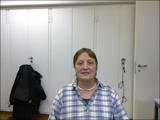

In [6]:
im.to_thumb(160)

In [12]:
cal = np.genfromtxt(path/'01'/'rgb.cal', skip_footer=6)

def get_ctr(f):
    ctr = np.genfromtxt(img2pose(f), skip_header=3)
    c1 = ctr[0] * cal[0][0] / ctr[2] + cal[0][2]
    c2 = ctr[1] * cal[1][1] / ctr[2] + cal[1][2]
    return tensor([c1,c2])

In [13]:
get_ctr(img_files[0])

tensor([350.4915, 262.9643])